In [4]:
import pandas as pd

df = pd.read_csv("NetflixViewingHistory.csv")

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')  # FIXED

print(df.head())
print(df.info())


                    Title       Date
0              The Ritual 2025-11-15
1         Despicable Me 2 2025-11-15
2            Vash Level 2 2025-11-14
3                 Abigail 2025-11-14
4  Swades: We, the People 2025-11-14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Title   411 non-null    object        
 1   Date    411 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 6.6+ KB
None


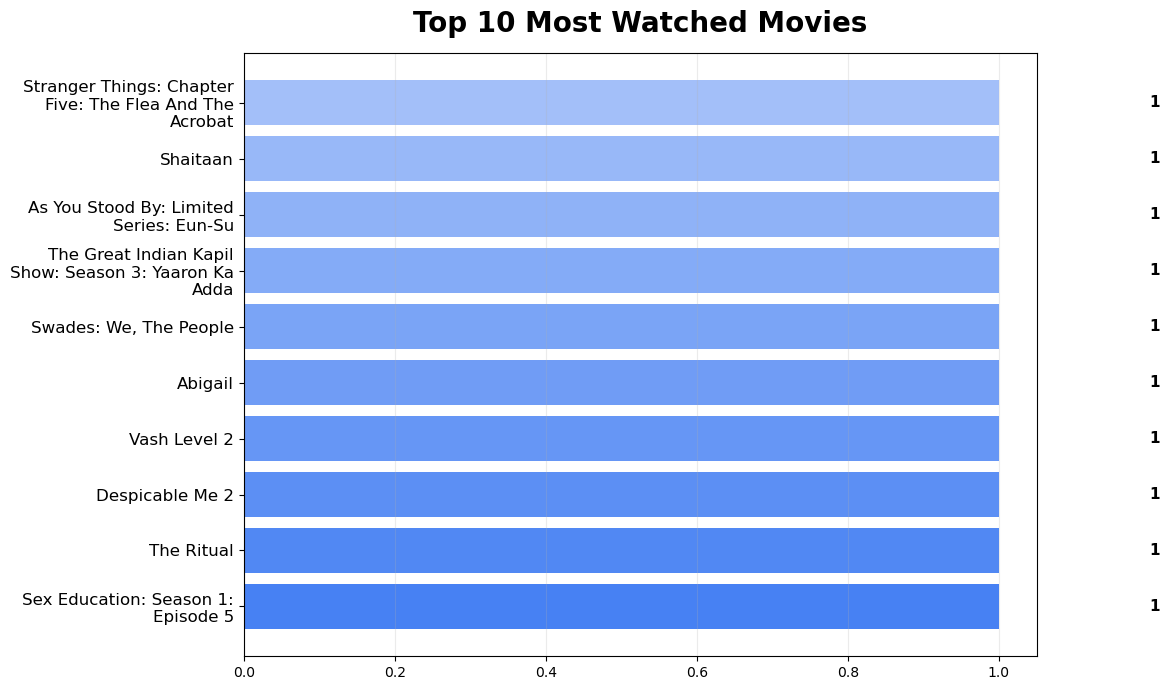

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Top 10 movies
top_movies = df['Title'].value_counts().head(10)

# Wrap long names
def wrap_label(s, width=25):
    return "\n".join(textwrap.wrap(str(s).title(), width=width))

wrapped_labels = [wrap_label(t, width=25) for t in top_movies.index]

fig, ax = plt.subplots(figsize=(12,7))

# Plot horizontal bars
bars = ax.barh(
    range(len(top_movies)),
    top_movies.values,
    edgecolor='none'
)

# Color gradient styling
for i, bar in enumerate(bars):
    base_color = np.array([0.20, 0.45, 0.95])
    shade = 0.90 - i * 0.05
    bar.set_facecolor(tuple(base_color) + (shade,))

# Add counts next to each bar
for i, (bar, val) in enumerate(zip(bars, top_movies.values)):
    ax.text(val + 0.2, bar.get_y() + bar.get_height()/2,
            str(val), va='center', fontsize=11, fontweight='bold')

# Y-axis labels (clean titles)
ax.set_yticks(range(len(top_movies)))
ax.set_yticklabels(wrapped_labels, fontsize=12)

ax.set_title("Top 10 Most Watched Movies", fontsize=20, fontweight='bold', pad=15)
ax.grid(axis='x', alpha=0.25)

plt.tight_layout()
plt.show()


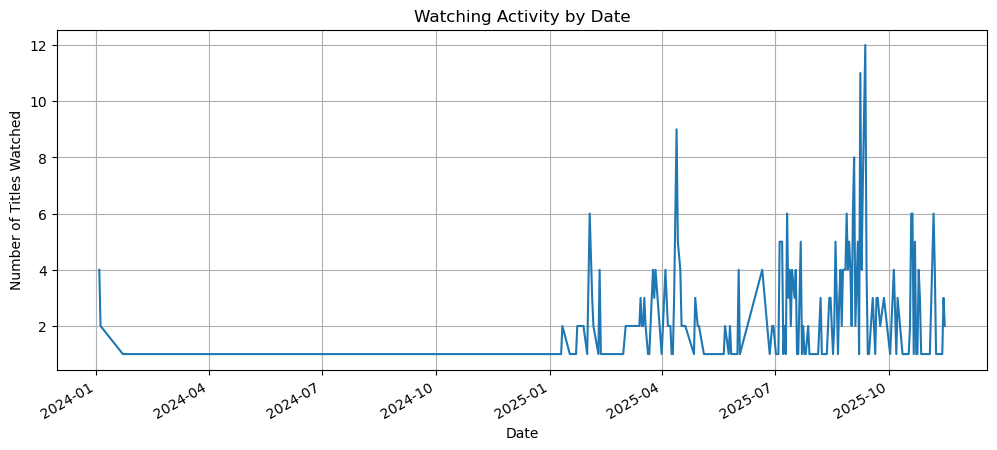

In [8]:
daily = df['Date'].value_counts().sort_index()

plt.figure(figsize=(12,5))
daily.plot()
plt.title("Watching Activity by Date")
plt.xlabel("Date")
plt.ylabel("Number of Titles Watched")
plt.grid(True)
plt.show()


In [13]:
rewatch = df['Title'].value_counts()
rewatch = rewatch[rewatch > 1]   # only titles watched more than once

if rewatch.empty:
    print("You have no rewatched movies 😄")
else:
    rewatch.plot(kind='bar', color='orange')
    plt.title("Most Rewatched Movies")
    plt.xlabel("Movie")
    plt.ylabel("Watch Count")
    plt.show()


You have no rewatched movies 😄


In [11]:
print("Total Titles Watched:", len(df))
print("Unique Titles:", df['Title'].nunique())
print("Most Watched Movie:", df['Title'].value_counts().idxmax())


Total Titles Watched: 411
Unique Titles: 411
Most Watched Movie: Sex Education: Season 1: Episode 5


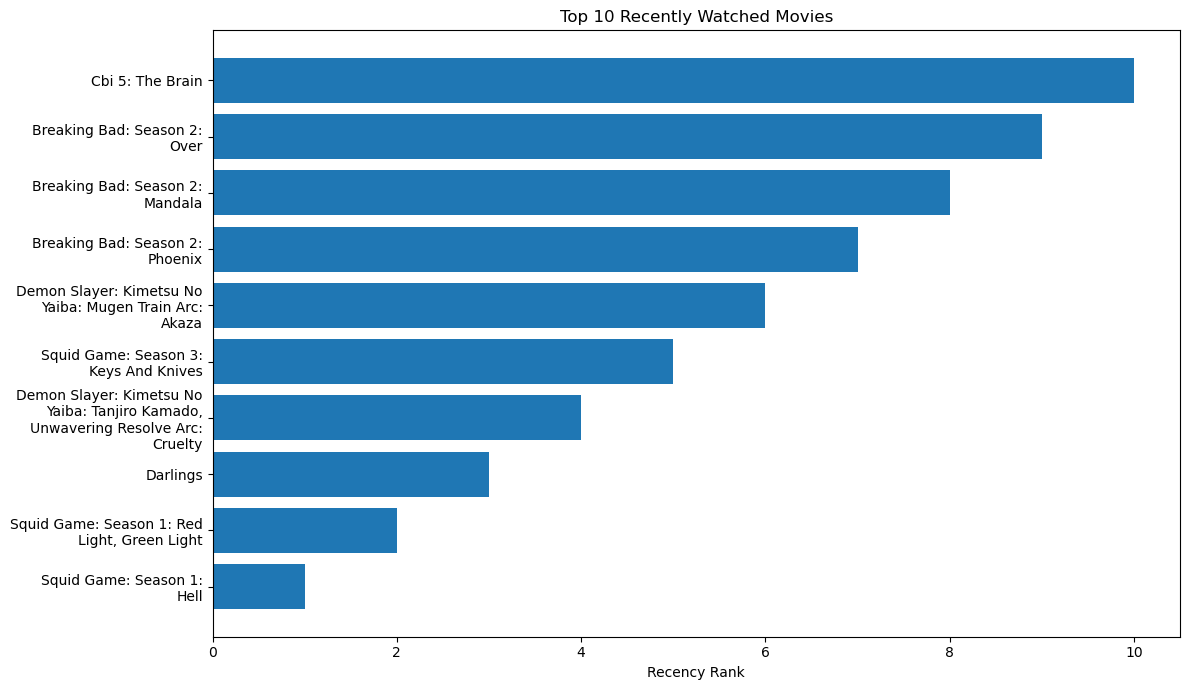

In [20]:
import matplotlib.pyplot as plt
import textwrap

latest = df.sort_values("Date", ascending=False).head(10)

labels = [ "\n".join(textwrap.wrap(str(t).title(), 25)) for t in latest['Title'] ]

plt.figure(figsize=(12,7))
plt.barh(labels, range(10,0,-1))
plt.title("Top 10 Recently Watched Movies")
plt.xlabel("Recency Rank")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


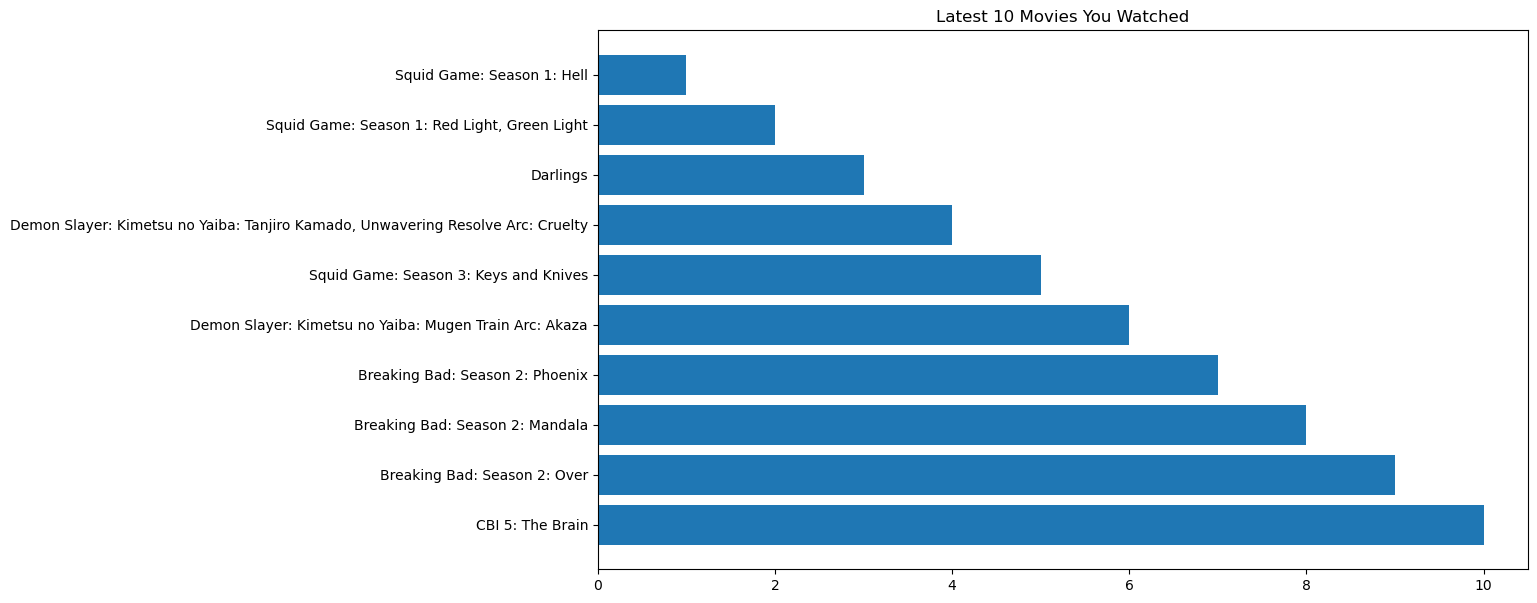

In [22]:
latest = df.sort_values("Date", ascending=False).head(10)

plt.figure(figsize=(12,7))
plt.barh(latest['Title'], range(10,0,-1))
plt.title("Latest 10 Movies You Watched")
plt.show()


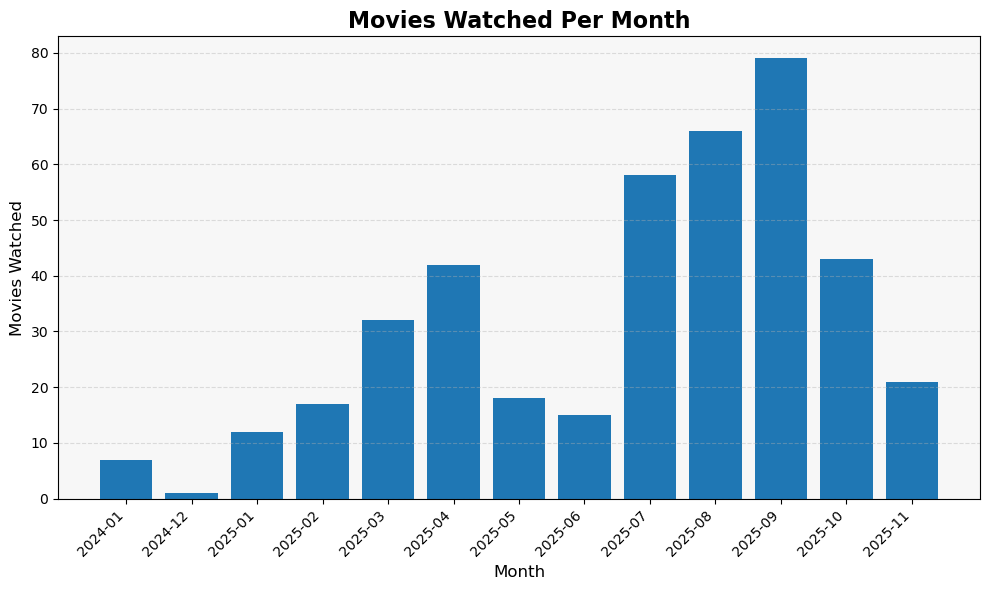

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("NetflixViewingHistory.csv")

# Remove warning by specifying format
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%y")

df['Month'] = df['Date'].dt.to_period('M')
monthly = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(monthly.index.astype(str), monthly.values)

plt.title("Movies Watched Per Month", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Movies Watched", fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()
